# Connect to google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Import python librairies

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read csv into a pandas DataFrame

In [ ]:
food = pd.read_csv("/content/drive/My Drive/OpenClassrooms/en.openfoodfacts.org.products.csv", delimiter='\t', encoding='utf-8', low_memory=False)

# Data cleaning

## Data overview

The dataset is quite large with more than 1.4M observations and 182 variables.

In [ ]:
food.shape

(1481112, 182)

Let's have a look at the numerical variables using describe() function.

In [ ]:
food.describe()

,created_t,last_modified_t,cities,allergens_en,serving_quantity,no_nutriments,additives_n,additives,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutriscore_score,nova_group,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,...,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
count,1.481112e+06,1.481112e+06,0.0,0.0,4.440400e+05,0.0,648075.000000,0.0,648075.000000,0.0,648075.000000,0.0,590449.000000,564726.000000,1.081770e+05,1.123114e+06,1.191329e+06,965.000000,1.181920e+06,1.135564e+06,4.000000,1.0,2.000000,4.000000,9.000000,1.0,3.000000,1.0,45.000000,18.000000,0.0,4.0,2.000000,0.0,46527.000000,46560.000000,1830.000000,392.000000,111.000000,152.000000,...,8427.000000,1.224800e+04,959.000000,5849.000000,108.000000,354.000000,91421.000000,639.000000,268716.000000,13471.000000,263980.000000,14390.000000,9984.000000,4207.000000,3963.000000,2.960000e+02,2395.000000,169.000000,225.000000,2001.000000,378.000000,137.000000,165.000000,8492.000000,291.000000,11503.000000,307.000000,5572.000000,3.000000,4.330000e+02,10745.000000,590449.000000,28.000000,3.000000,0.0,38.000000,1712.000000,24.000000,44.000000,20.000000
mean,1.539887e+09,1.574252e+09,NaN,NaN,2.502277e+16,NaN,2.029995,NaN,0.020785,NaN,0.069564,NaN,9.160097,3.436567,6.161715e+37,7.741126e+06,5.595061e+36,351.396580,1.383440e+01,1.197643e+08,0.018655,48.0,52.200000,3.225000,37.393859,18.9,2.702393,3.0,3.771729,1.184178,NaN,1.0,31.000000,NaN,9.502749,5.829215,4.471135,2.851531,1.884285,0.615363,...,0.026561,1.497028e-02,0.246241,0.045097,0.100255,1.515184,0.417573,0.361623,0.166604,0.593556,0.006697,0.369014,0.021778,0.022148,0.006876,6.656424e-02,0.018107,0.635844,0.018086,0.070718,1.317247,6.531828,6.719827,34.309534,22.710742,46.212502,15.188378,51.359350,1.121383,-2.309469e+95,630.489242,9.160097,7.928571,29.333333,NaN,0.068208,0.068920,3.719583,0.025891,0.038885
std,4.637042e+07,2.632507e+07,NaN,NaN,1.667426e+19,NaN,2.881585,NaN,0.144479,NaN,0.301780,NaN,8.914296,0.958540,2.026605e+40,8.203524e+09,6.106899e+39,520.016137,1.696718e+02,1.276242e+11,0.031695,NaN,63.356768,3.270285,21.246252,NaN,4.674465,NaN,14.673064,3.635962,NaN,2.0,42.426407,NaN,15.847803,10.189928,24.747649,8.139688,9.487581,1.746225,...,1.864974,7.063606e-01,3.729945,0.871961,0.566042,13.007476,7.154730,3.990942,4.632084,10.372674,0.326953,6.923698,0.495653,1.102396,0.118233,9.890907e-01,0.587931,7.636393,0.266659,1.265176,7.915466,48.160150,1.560464,36.491249,34.139614,28.754566,5.910622,22.876728,0.798713,4.805693e+96,6388.293270,8.914296,9.059182,15.011107,NaN,0.036215,1.826776,1.530099,0.026873,0.125679
min,1.328021e+09,1.333873e+09,NaN,NaN,0.000000e+00,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,-15.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,48.0,7.400000,0.0000

We can clearly identified that there are outliers based on the max value. We will treat them later.


In [ ]:
food.dtypes.value_counts()

float64    123
object      57
int64        2
dtype: int64

There are 125 numerical columns and 57 text based columns.

##Nan Values##

In [ ]:
food['fruits-vegetables-nuts-dried_100g'].isnull().value_counts()

True     1480821
False        291
Name: fruits-vegetables-nuts-dried_100g, dtype: int64

In [ ]:
food['fruits-vegetables-nuts_100g'].isnull().value_counts()

True     1472620
False       8492
Name: fruits-vegetables-nuts_100g, dtype: int64

In [ ]:
food['fruits-vegetables-nuts-estimate_100g'].isnull().value_counts()

True     1469609
False      11503
Name: fruits-vegetables-nuts-estimate_100g, dtype: int64

We notice that most of the numerical variables can be dispatched into 7 groups:


*   Fat
*   Carbohydrates
*   Proteins
*   Salt / Sodium
*   Fiber
*   Vitamins
*   Minerals



**Protein & Salt / Sodium**

In [ ]:
food.loc[:,'proteins_100g':'sodium_100g'].isnull().sum()

proteins_100g           298040
casein_100g            1481071
serum-proteins_100g    1481075
nucleotides_100g       1481098
salt_100g               321521
sodium_100g             321527
dtype: int64

**Fat**

In [ ]:
food.loc[:,'fat_100g':'cholesterol_100g'].isnull().sum()

fat_100g                              299192
saturated-fat_100g                    345548
-butyric-acid_100g                   1481108
-caproic-acid_100g                   1481111
-caprylic-acid_100g                  1481110
-capric-acid_100g                    1481108
-lauric-acid_100g                    1481103
-myristic-acid_100g                  1481111
-palmitic-acid_100g                  1481109
-stearic-acid_100g                   1481111
-arachidic-acid_100g                 1481067
-behenic-acid_100g                   1481094
-lignoceric-acid_100g                1481112
-cerotic-acid_100g                   1481108
-montanic-acid_100g                  1481110
-melissic-acid_100g                  1481112
monounsaturated-fat_100g             1434585
polyunsaturated-fat_100g             1434552
omega-3-fat_100g                     1479282
-alpha-linolenic-acid_100g           1480720
-eicosapentaenoic-acid_100g          1481001
-docosahexaenoic-acid_100g           1480960
omega-6-fa

**Carbohydrates & Fiber**

In [ ]:
food.loc[:,'carbohydrates_100g':'-insoluble-fiber_100g'].isnull().sum()

carbohydrates_100g        299795
sugars_100g               320984
-sucrose_100g            1480986
-glucose_100g            1481059
-fructose_100g           1481038
-lactose_100g            1480439
-maltose_100g            1481103
-maltodextrins_100g      1481095
starch_100g              1480684
polyols_100g             1477643
fiber_100g               1031496
-soluble-fiber_100g      1477516
-insoluble-fiber_100g    1477786
dtype: int64

**Vitamins & Minerals**

In [ ]:
food.loc[:,'alcohol_100g':].isnull().sum()

alcohol_100g                               1464420
vitamin-a_100g                             1269262
beta-carotene_100g                         1481032
vitamin-d_100g                             1471980
vitamin-e_100g                             1478077
vitamin-k_100g                             1480040
vitamin-c_100g                             1261704
vitamin-b1_100g                            1457965
vitamin-b2_100g                            1458880
vitamin-pp_100g                            1457764
vitamin-b6_100g                            1465540
vitamin-b9_100g                            1471253
folates_100g                               1472685
vitamin-b12_100g                           1468864
biotin_100g                                1480153
pantothenic-acid_100g                      1475263
silica_100g                                1481004
bicarbonate_100g                           1480758
potassium_100g                             1389691
chloride_100g                  

In [ ]:
(food.select_dtypes(include=['float', 'int']).isnull().sum()/len(food)).sort_values(ascending=True)[:25]


created_t                                  0.000000
last_modified_t                            0.000000
energy_100g                                0.195652
proteins_100g                              0.201227
fat_100g                                   0.202005
carbohydrates_100g                         0.202412
sugars_100g                                0.216718
salt_100g                                  0.217081
sodium_100g                                0.217085
saturated-fat_100g                         0.233303
energy-kcal_100g                           0.241709
additives_n                                0.562440
ingredients_from_palm_oil_n                0.562440
ingredients_that_may_be_from_palm_oil_n    0.562440
nutriscore_score                           0.601348
nutrition-score-fr_100g                    0.601348
nova_group                                 0.618715
fiber_100g                                 0.696433
serving_quantity                           0.700198
calcium_100g

The most relevant numerical columns have less than 70% of null values. 
--> Drop all numurical columns with more than 70% nan values.



In [ ]:
(food.select_dtypes(include='object').isnull().sum()/len(food)).sort_values(ascending=False)

packaging_text                                0.999979
ingredients_from_palm_oil_tags                0.991019
ingredients_that_may_be_from_palm_oil_tags    0.974189
first_packaging_code_geo                      0.957314
origins_tags                                  0.957012
origins                                       0.956940
cities_tags                                   0.953980
traces                                        0.943902
emb_codes_tags                                0.932511
emb_codes                                     0.932491
manufacturing_places_tags                     0.931959
manufacturing_places                          0.931931
traces_en                                     0.929392
traces_tags                                   0.929392
generic_name                                  0.928429
purchase_places                               0.905364
allergens                                     0.884198
stores                                        0.859277
packaging_

Following an assessment on null values, droping numerical columns with more than 70% of null values is a good choice. We don't loose much information since most of them are composition of macro nutriments: fat, carb, protein.

Vitamins and minerals columns are also dropped as they contain too many nan values to be analyzed.

Regarding the categorical columns, it is sensible to proceed this way as we get rid off useless columns. Most of them are just for information purposes but have little interest for this analysis.

In [ ]:
food_clean = food.dropna(axis=1, thresh=0.3*len(food))
food_clean.shape

(1481112, 47)

135 columns dropped.

In [ ]:
food_clean.isnull().sum()

code                                             0
url                                              0
creator                                          4
created_t                                        0
created_datetime                                 0
last_modified_t                                  0
last_modified_datetime                           0
product_name                                 68145
brands                                      658943
brands_tags                                 658996
categories                                  728403
categories_tags                             728403
categories_en                               728403
countries                                     5094
countries_tags                                5098
countries_en                                  5098
ingredients_text                            833038
additives_n                                 833037
ingredients_from_palm_oil_n                 833037
ingredients_that_may_be_from_pa

In [ ]:
food_clean.select_dtypes(include='object').columns

Index(['code', 'url', 'creator', 'created_datetime', 'last_modified_datetime',
       'product_name', 'brands', 'brands_tags', 'categories',
       'categories_tags', 'categories_en', 'countries', 'countries_tags',
       'countries_en', 'ingredients_text', 'nutriscore_grade', 'pnns_groups_1',
       'pnns_groups_2', 'states', 'states_tags', 'states_en', 'main_category',
       'main_category_en', 'image_url', 'image_small_url',
       'image_ingredients_url', 'image_ingredients_small_url',
       'image_nutrition_url', 'image_nutrition_small_url'],
      dtype='object')

I will drop further categorical columns below that are considered not to be helpful for the application. 
'created_t' and 'last_modified_t' dropped

In [ ]:
food_clean[food_clean['states_en'].str.contains('[Tt]o be completed') == False]['states_en'].value_counts()

To be checked,Complete,Nutrition facts completed,Ingredients completed,Expiration date completed,Packaging code completed,Characteristics completed,Categories completed,Brands completed,Packaging completed,Quantity completed,Product name completed,Photos validated,Photos uploaded                                                                                                      27121
Checked,Complete,Nutrition facts completed,Ingredients completed,Expiration date completed,Packaging code completed,Characteristics completed,Categories completed,Brands completed,Packaging completed,Quantity completed,Product name completed,Photos validated,Photos uploaded                                                                                                              767
To be checked,Complete,Nutrition facts completed,Ingredients completed,Expiration date completed,Packaging code completed,Characteristics completed,Categories completed,Brands completed,Packaging completed,Quantity completed

There are only approximatively 28000 rows that does not have 'To be completed status'. This columns is not really helpful in filtering the dataframe. I choose to get rid off 'states_en' column.

In [ ]:
drop_col = ['created_t', 'last_modified_t', 'url', 'creator', 'created_datetime', 'last_modified_datetime', 'brands', 'brands_tags',
       'categories_tags', 'categories_en', 'countries', 'countries_tags',
       'countries_en', 'ingredients_text', 'states', 'states_tags', 'states_en', 'main_category',
       'main_category_en', 'image_url', 'image_small_url',
       'image_ingredients_url', 'image_ingredients_small_url',
       'image_nutrition_url', 'image_nutrition_small_url']

Additional 25 categorical variables are ignored.

In [ ]:
food_clean = food_clean.drop(drop_col, axis=1)
food_clean.shape

(1481112, 22)

'Code' column has the wronf type. Convert ton 'float' type.

##Outliers##

In [ ]:
# convert the 'code' column into float
food_clean['code'] = food_clean['code'].astype(float)

In [ ]:
num_col = food_clean.select_dtypes(include=['int', 'float']).drop(['ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n'], axis=1).columns
print(num_col)

Index(['code', 'additives_n', 'nutriscore_score', 'nova_group',
       'energy-kcal_100g', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g'],
      dtype='object')


Most of the values from these two columns below are 0. There is little variability so we dropped them.

In [ ]:
df = food_clean.drop(['ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n'], axis=1)

Boxplots are useful to identify outliers. We use this technique below to visualize outliers from all remaining numerical variables.

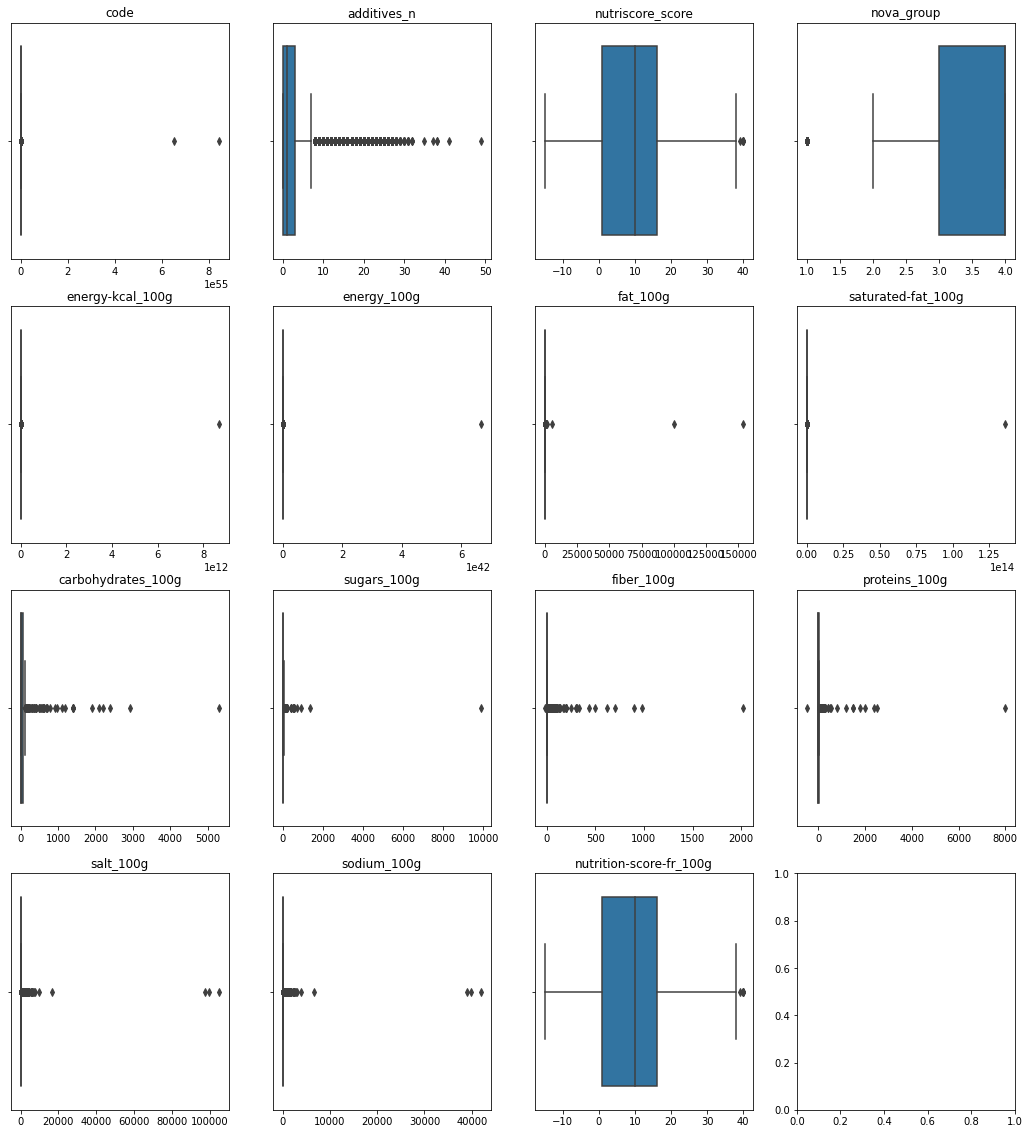

In [ ]:
fig, axes = plt.subplots(4,4, figsize=(18,20))
y=0
for col in num_col:
    i,j = divmod(y,4)
    sns.boxplot(ax = axes[i,j], x=food_clean[col], orient='h')#, x=food_clean.nutriscore_grade, order=['a', 'b', 'c', 'd', 'e'])
    axes[i,j].set_title(col)
    axes[i,j].set_ylabel('')   
    axes[i,j].set_xlabel('') 

    y=y+1


Most of the quantitative columns have outliers. This will be addressed below using the Inter Quartile Range method (IQR).

Current shape of our DataFrame.

In [ ]:
df.shape

(1481112, 20)

In [ ]:
# This function aims at identifying outliers using the IQR method. 
def IQR_bool(series):
  # compute Q1 and Q3 quantiles
  Q1 = series.quantile(.25)
  Q3 = series.quantile(.75)

  # compute the IQR
  IQR = Q3 - Q1

  # define the lower and upper boundaries. Any value outside of this range is considered as an outlier.
  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR

  outlier_upper = series > upper
  outlier_lower = series < lower

  # boolean indexing to detect the outlier position within the pandas serie.
  outlier_bool = outlier_upper | outlier_lower

  return outlier_bool

In [ ]:
df.columns

Index(['code', 'product_name', 'categories', 'additives_n', 'nutriscore_score',
       'nutriscore_grade', 'nova_group', 'pnns_groups_1', 'pnns_groups_2',
       'energy-kcal_100g', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g'],
      dtype='object')

We will apply the IQR_bool function to the column below. (all df.columns except the 2 nutriscore, nova group and text columns)

In [ ]:
col_IQR = ['code', 'additives_n',
       'energy-kcal_100g', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g']

In [ ]:
# count outliers and append to a dictionary
count_outliers = {}
for col in col_IQR:
  count_outliers[col] = IQR_bool(df[col]).value_counts()[True]

In [ ]:
count_outliers
sorted_dict = sorted(count_outliers.items(),
                           key=lambda item: item[1],
                           reverse=True)
sorted_dict

[('sugars_100g', 103597),
 ('saturated-fat_100g', 87437),
 ('sodium_100g', 70591),
 ('salt_100g', 70589),
 ('fat_100g', 40090),
 ('additives_n', 35942),
 ('proteins_100g', 35563),
 ('fiber_100g', 32638),
 ('energy_100g', 12611),
 ('energy-kcal_100g', 12541),
 ('code', 8640),
 ('carbohydrates_100g', 68)]

In [ ]:
# This will iterate through the numerical columns and return True if there is at least one outlier in the row.
for i,col in enumerate(col_IQR):
  if i == 0:
    outlier_bool = IQR_bool(df[col])
  else:
    outlier_bool = outlier_bool | IQR_bool(df[col]) # for a given index, this will return True if at least one column in col_IQR has True at this index.

outlier_bool.value_counts() 

False    1126068
True      355044
dtype: int64

There are 355044 indexes identified with at least one outliers.

In [ ]:
# filter the dataframe to remove rows with at least one outlier.
df = df[outlier_bool == False]
df.shape

(1126068, 20)

Boxplot are shown again below to see the distribution of numerical variables witout outliers.

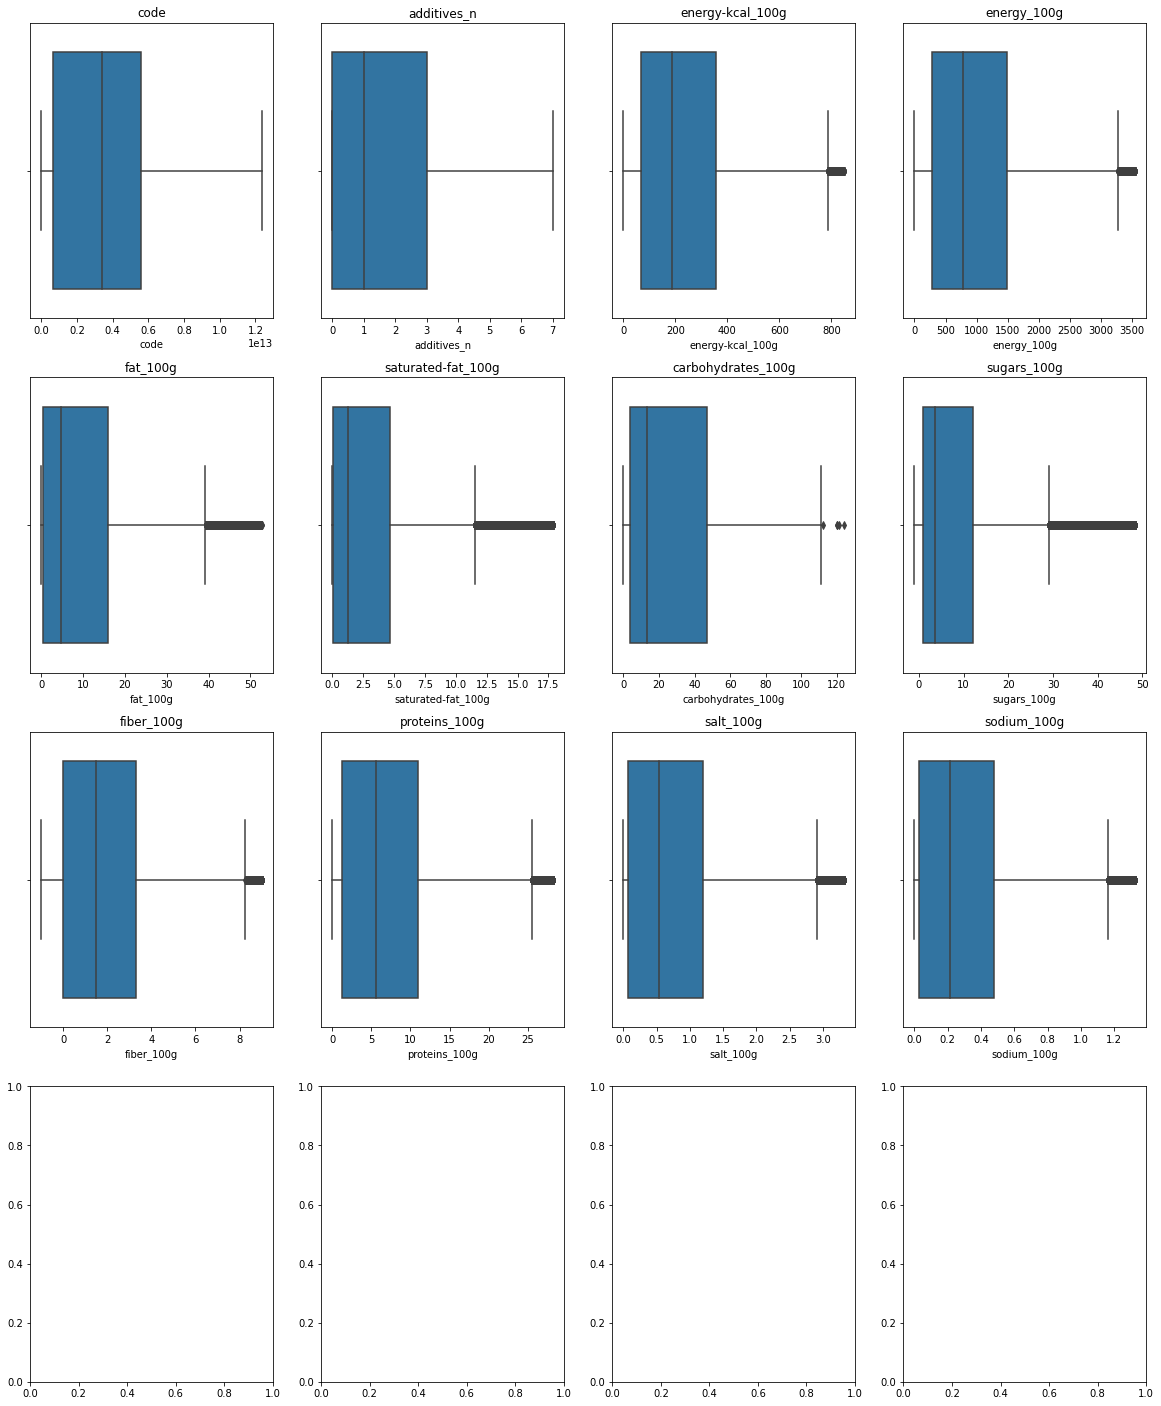

In [ ]:
fig, axes = plt.subplots(4,4, figsize=(20,25))
y=0
for col in col_IQR:
    i,j = divmod(y,4)
    sns.boxplot(ax = axes[i,j], x=df[col], orient='h')#, x=food_clean.nutriscore_grade, order=['a', 'b', 'c', 'd', 'e'])
    axes[i,j].set_title(col)
    axes[i,j].set_ylabel('')    
    y=y+1


We were able to remove most of the outliers using the IQR. There are still values outside the boxplot but they look sensible so we keep them.

However, looking specifically at the carbohydrates boxplot we can see there are few values above 100 which does not make any sense. We will address this problem later.

## Duplicate

There are 42 duplicated rows that we remove.

In [ ]:
# boolean indexing of non duplicated rows
no_dup = df.duplicated() == False
df = df[no_dup] # remove duplicated rows from df
df.shape

(1126026, 20)

In [ ]:
# fig, axes = plt.subplots(4,4, figsize=(20,25))
# y=0
# for col in col_IQR:
#     i,j = divmod(y,4)
#     sns.distplot(ax = axes[i,j], x=df[col])#, x=food_clean.nutriscore_grade, order=['a', 'b', 'c', 'd', 'e'])
#     axes[i,j].set_title(col)
#     axes[i,j].set_ylabel('')    
#     y=y+1

In [ ]:
# df.groupby(['nutriscore_grade']).mean()

## Filter DataFrame

In [ ]:
df.loc[:,'carbohydrates_100g':'fiber_100g'].describe()

,carbohydrates_100g,sugars_100g,fiber_100g
count,831198.000000,818554.000000,311707.000000
mean,25.101998,8.939033,2.051078
std,25.562861,11.742291,2.186765
min,0.000000,-1.000000,-1.000000
25%,4.000000,0.800000,0.000000
50%,13.330000,3.520000,1.500000
75%,47.000000,12.080000,3.300000
max,124.000000,48.340000,9.000000


Filter the df by removing observations where:
  - sugars < 0
  - fiber < 0
  - sum(carb, fat, prot, fiber) > 100

In [ ]:
sugar_fiber = (df.sugars_100g < 0) | (df.fiber_100g  < 0)
energy_cap_100 = (df.carbohydrates_100g + df.fat_100g + df.proteins_100g + df.fiber_100g) > 100

df = df[(energy_cap_100 | sugar_fiber) == False]
df.shape

(1116339, 20)

In [ ]:
# format this column to make it consistent
df['pnns_groups_1'] = df['pnns_groups_1'].str.lower().str.replace(" ", "-")
df['pnns_groups_1'].value_counts()

unknown                    679501
sugary-snacks               63388
fish-meat-eggs              59865
cereals-and-potatoes        57260
milk-and-dairy-products     53273
beverages                   52806
fruits-and-vegetables       42097
composite-foods             41034
fat-and-sauces              34202
salty-snacks                18548
Name: pnns_groups_1, dtype: int64

In [ ]:
df['pnns_groups_2'] = df['pnns_groups_2'].str.lower().str.replace(" ", "-")

Filter the dataframe to keep only the rows that comply with **all** 4 conditions below:
  - (fiber & carbohydrate & fat & protein) not null
  - (pnns_groups_1 not null) & (pnns_groups_1 != 'unknown')
  - (energy-kcal or energy) not null
  - (salt or sodium) not null

The first condition is important because these 4 nutrients can help checking the energy using the formula. (see further down)

The second condition is useful to categorise each product. So we want to get rid off all 'Nan' and 'unknown' values.

The 3rd condition requires only one of the two values not to be null. For example if energy-kcal is missing then we can impute the energy value and vice versa (1 kcal = 4.184 kj). After imputation, only one column will be kept (energy-kcal).

4th condition: same explanation as 3.

In [ ]:
nutrients_bool = df['fiber_100g'].notnull() & df['carbohydrates_100g'].notnull() & df['fat_100g'].notnull() & df['proteins_100g'].notnull()
pnns_1_bool = df['pnns_groups_1'].notnull() & (df['pnns_groups_1'] != 'unknown')
energy_bool = df['energy-kcal_100g'].notnull() | df['energy_100g'].notnull()
# salt_bool = df['salt_100g'].notnull() | df['sodium_100g'].notnull()

In [ ]:
filter_bool = nutrients_bool & pnns_1_bool & energy_bool#& salt_bool
filter_bool.value_counts()

False    911499
True     204840
dtype: int64

By applying the filter above we keep only 203897 rows.

In [ ]:
df = df[filter_bool]
df.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(204840, 20)

## Check Energy

We know that energy on one hand and fat, carbohydrate and proteins on the other hand are closely related. In fact, we can approximate the energy value by knowing the macro nutrients values using the following formula:

**Energy (kcal) = Fat(g) * 9 + Carb(g) * 4 + Protein(g) * 4**

Fat = 9 kcal/g 

Protein = 4 kcal/g

Carbohydrates = 4 kcal/g

In [ ]:
from sklearn.linear_model import LinearRegression
df_test = df[['carbohydrates_100g', 'proteins_100g', 'fat_100g', 'energy-kcal_100g']].dropna()
X = df_test[['fat_100g', 'carbohydrates_100g', 'proteins_100g']]
y = df_test[df_test['energy-kcal_100g'].notnull()]
regressor = LinearRegression()
regressor.fit(X, y)

regressor.coef_

array([[ 7.08444940e-16,  1.00000000e+00,  1.11022302e-16],
       [ 1.03372876e-16,  5.55111512e-17,  1.00000000e+00],
       [ 1.00000000e+00,  2.64956651e-17, -2.04542400e-17],
       [ 8.85970606e+00,  3.94638097e+00,  4.02092560e+00]])

These coefficents are really close to our expectation. This check enhance the confidence we have on the remaining data. It is also a good signal after the cleaning  we did.


In [ ]:
df.isnull().sum()

code                           0
product_name                 648
categories                     0
additives_n                11719
nutriscore_score            7009
nutriscore_grade            7009
nova_group                 22467
pnns_groups_1                  0
pnns_groups_2                  0
energy-kcal_100g           23305
energy_100g                    0
fat_100g                       0
saturated-fat_100g          2141
carbohydrates_100g             0
sugars_100g                 1080
fiber_100g                     0
proteins_100g                  0
salt_100g                    943
sodium_100g                  944
nutrition-score-fr_100g     7009
dtype: int64

There are still Nan values. We will treat them in the exploratory analysis notebook using KNN Imputation algorithm.

# Export cleaned DataFrame

In [ ]:
df.groupby(['nutriscore_grade']).mean()

,code,additives_n,nutriscore_score,nova_group,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
nutriscore_grade,,,,,,,,,,,,,,,
a,2.061674e+12,0.698359,-3.751872,2.582842,142.611809,599.592939,2.036219,0.354350,24.156955,3.999166,2.657401,6.566112,0.327539,0.131017,-3.751872
b,2.294399e+12,1.525628,0.863973,3.433313,136.386571,569.186832,4.065896,1.004652,18.469657,4.523359,1.435421,6.197975,0.618214,0.247292,0.863973
c,2.363296e+12,1.718196,5.639019,3.534588,201.417923,841.532385,8.006043,2.036303,25.016486,8.252970,1.817731,6.554933,0.899649,0.359858,5.639019
d,2.062173e+12,2.289553,13.609716,3.704564,299.265705,1252.784827,14.798283,5.248796,32.997892,13.204252,1.512292,8.280935,1.240352,0.496131,13.609716
e,1.992947e+12,2.472223,19.635827,3.739802,324.575439,1361.851910,17.366830,7.645608,36.806074,21.187075,1.126876,5.308440,0.870991,0.348402,19.635827


In [ ]:
df.shape

(204840, 20)

In [ ]:
df.describe()

,code,additives_n,nutriscore_score,nova_group,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,2.048400e+05,193121.000000,197831.000000,182373.000000,181535.000000,204840.000000,204840.000000,202699.000000,204840.000000,203760.000000,204840.000000,204840.000000,203897.000000,203896.000000,197831.000000
mean,2.165580e+12,1.614635,5.583129,3.321703,209.820309,875.032875,8.099083,2.735196,27.015596,9.153213,1.835582,6.645158,0.758178,0.303272,5.583129
std,2.651589e+12,1.924658,8.559669,1.039789,158.692503,663.321511,10.308587,4.090280,26.357979,11.680585,2.063031,6.177745,0.743109,0.297242,8.559669
min,5.000000e+00,0.000000,-15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,5.042849e+10,0.000000,-1.000000,3.000000,65.000000,276.000000,0.500000,0.000000,5.770000,1.200000,0.000000,1.590000,0.100000,0.040000,-1.000000
50%,7.839630e+11,1.000000,3.000000,4.000000,170.000000,702.000000,3.300000,0.700000,14.000000,3.890000,1.200000,5.260000,0.620000,0.248000,3.000000
75%,3.523680e+12,3.000000,12.000000,4.000000,353.000000,1477.000000,13.000000,3.600000,50.000000,12.000000,3.000000,10.000000,1.172500,0.469000,12.000000
max,1.078562e+13,7.000000,35.000000,4.000000,848.000000,3548.000000,52.630000,17.850000,100.000000,48.330000,9.000000,28.200000,3.315000,1.326000,35.000000


In [ ]:
df.to_csv('/content/drive/My Drive/OpenClassrooms/P2/P2_openfoodfacts_exploration.csv', index=False)

In [ ]:
df['pnns_groups_1'].value_counts()

cereals-and-potatoes       36769
sugary-snacks              29562
composite-foods            24343
fruits-and-vegetables      23776
milk-and-dairy-products    23625
fish-meat-eggs             21597
beverages                  19821
fat-and-sauces             18970
salty-snacks                6377
Name: pnns_groups_1, dtype: int64

In [ ]:
df['pnns_groups_2'].value_counts()

biscuits-and-cakes                  22085
one-dish-meals                      19801
cereals                             18530
dressings-and-sauces                17858
vegetables                          14769
milk-and-yogurt                     13531
bread                               10291
fish-and-seafood                     7691
fruits                               7232
processed-meat                       7204
cheese                               6475
sweets                               6005
sweetened-beverages                  5931
meat                                 5825
unsweetened-beverages                5110
appetizers                           3942
legumes                              3450
breakfast-cereals                    3346
pizza-pies-and-quiche                3330
plant-based-milk-substitutes         2866
fruit-juices                         2677
artificially-sweetened-beverages     2112
ice-cream                            2083
salty-and-fatty-products          

In [ ]:
df[df['pnns_groups_1']=='fruits-and-vegetables']['nutriscore_grade'].value_counts()

a    20371
b     1923
c      693
d       55
e        5
Name: nutriscore_grade, dtype: int64

In [ ]:
df[df['pnns_groups_1']=='cereals-and-potatoes']['nutriscore_grade'].value_counts()

a    17547
b     6628
c     6304
d     4451
e      874
Name: nutriscore_grade, dtype: int64

In [ ]:
df[df['pnns_groups_1']=='sugary-snacks']['nutriscore_grade'].value_counts()

e    11240
d    10788
c     4224
b     1017
a      471
Name: nutriscore_grade, dtype: int64

In [ ]:
df[df['pnns_groups_1']=='composite-foods']['nutriscore_grade'].value_counts()

c    7457
b    7437
a    4897
d    3835
e     207
Name: nutriscore_grade, dtype: int64

In [ ]:
df[df['pnns_groups_1']=='milk-and-dairy-products']['nutriscore_grade'].value_counts()

b    6538
d    6188
c    5230
a    4752
e     591
Name: nutriscore_grade, dtype: int64

In [ ]:
df[df['pnns_groups_1']=='fish-meat-eggs']['nutriscore_grade'].value_counts()

d    5332
a    4628
c    4515
b    4016
e    2725
Name: nutriscore_grade, dtype: int64